# Chapter 2: Information Criterions and Bootstrap Confidence Intervals

In this chapter, we'll cover the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) for nested models, as well as the bootstrap method for confidence intervals. 

## Nested Models

Let's say we have model A with variables $\theta_1$, $\theta_2$ and $\theta_3$. Model B is nested in model A if model B contains a subset of the variables of model A, e.g. if model B has variables $\theta_1$ and $\theta_3$. We call model B a $\textbf{nested model}$. 
Model B is $\textbf{not}$ a nested model if it contains a variable that model A doesn't contain, e.g. if model B has variables $\theta_1$, $\theta_3$ and $\theta_4$. 

Model A can be seen as the true model which describes the data. When researching, you don't know the true model, but you can construct a model B which is a nested model of model A. In order to check if model B doesn't include unnecessary parameters and that the model isn't overfitting the data, the Akaike Information Criterion and the Bayesian Information Criterion can be used.  


## Akaike Information Criterion (AIC)
The Akaike Information Criterion (AIC) is an estimator of prediction error of statistical models. It is a method for evaluating how well a model fits the data it was generated from. AIC is used to compare different models and determine which model is the best fit. This best fit is the one that explains the greatest amount of variation and has the minimal amount of information loss, using the fewest amount of parameters. The equation for the AIC is as follows;

<a id="eq:AIC"></a>
$$AIC = - 2\ln(\hat{L}) + 2p_k .\tag{2.1}$$
It combines the maximum likelihood $\hat{L}$ and the number of parameters $p_k$. The best model will give the lowest value. From [Eq. 2.1](#eq:AIC) you can see that the AIC discourages overfitting. By adding more parameters, the AIC value will increase. The goodness of the fit, determined with the max-likelihood, will help decrease the AIC score.

**Note**: The AIC gives a qualitative comparison between models, it *does not* say anything about the quality of the models themself. So after selecting a model with the AIC, you need to validate the quality of the model. This can be done for instance by checking the models residuals.

### Simple usage of AIC values
Let $\mathrm{AIC}_{min}$ be the minimal AIC value. The following expression can be used to compare different AIC scores ($\mathrm{AIC}_{i}$) with $\mathrm{AIC}_{min}$.
<a id="eq:AIC comparison"></a>
$$c = e^{\frac{\mathrm{AIC}_{min} - \mathrm{AIC}_{i}}{2}},\tag{2.2}$$
This quantity $c$ is proportional to the probability of that the model $\mathrm{AIC}_{i}$ minimizes the information loss.
Say you have three models with the following values: $\mathrm{AIC}_1 = 101$, $\mathrm{AIC}_2 = 104$ and $\mathrm{AIC}_3 = 111$.

[//]: # "'vo!!!!!!!"
\begin{equation}
c = 
\begin{cases}
e^{\frac{101 - 104}{2}} \approx 0.223 \\
e^{\frac{101 - 111}{2}} \approx 0.007\\
\end{cases}
\end{equation}
This means that model 2 is 0.223 times and model 3 is 0.007 times as probable as model 1 to minimize the information loss. Depending on the selection criteria, model 3 can probably be rejected. The quantity $c$ is known as the relative likelihood of model $i$ and it is closely related to the likelihood ratio used in the likelihood-ratio test.


## Bayesian Information Criterion (BIC)


The Bayesian Information Criterion (BIC) is another statistical measure used to evaluate how good of a fit a model is. As with the AIC, both unexplained variation and a higher number of variables increase the BIC value. However, in addition to the penalty for the number of parameters in the AIC, the BIC also penalises for the amount of data points n. The equation for the BIC is as follows:

$$ BIC = -2\ln(\hat{L}) + \ln(n)p_k $$

where $\hat{L}$ is the maximum likelihood, n is the number of data points and $p_k$ is the number of parameters.


One of the advantages of using the Bayesian Information Criterion is that it's fairly simple and therefore easy to compute. Its penalty for the amount of parameters also helps preventing overfitting and using the BIC to compare models is very straightforward in general.
Of course, the BIC also has its disadvantages. One important limitation to the BIC is that n has to be much larger than k for the expression to be valid. It also relies on assuming that the true model is one of the candidate models, and the same penalty for the number of parameters that helps prevent overfitting might also lead to oversimplification.

Let's see a simple example of using the Bayesian Information Criterion below. We'll compare some model A and B for a dataset of 600 data point and we assume the maximum likelihood is 0.5 for model A and 0.3 for model B. Furthermore, model A uses 3 parameters while model B uses 4.
$$
\begin{cases}
    \text{BIC}_A = -2\ln{0.5} + \ln(600) * 3 \approx 20.6\\
    \text{BIC}_B = -2\ln{0.3} + \ln(600) * 4 \approx 28.0
\end{cases}
$$

Since we want to minimalise the BIC value, the model with the lowest BIC (model A in the example) is assumed to be a better model than the one with a higher BIC. A little disclaimer: this does not necessarily mean that the model with the lowest BIC is a good fitting model objectively, it just means it explains the data better than the other model did. 

In the example above, we just assumed that the maximum likelihoods were equal to certain numbers, but normally you would need to calculate the likelihood yourself. [Chapter 1](https://github.com/t-kist/Bayesian-Statistics-for-Astrophysics-2024/blob/main/bayes24/lecture_notes/group1/Chapter%201.ipynb) contains more information about calculating the maximum likelihood. 

## AIC vs BIC 

Though the Akaike Information Criterion and the Bayesian Information Criterion are pretty similar, they also have their differences. As mentioned above, the AIC assumes the true model isn't among the tested models, while the BIC assumes the true model $\textit{is}$ among the tested models. Furthermore, the BIC penalises the complexity of the models more than the AIC does. Both of these differences lead towards the following; When $n \rightarrow \infty$ and $p_k < \sqrt{n}$:

+ AIC selects the best predictive model among a number of possibly misspecified models.
+ BIC selects the true model (with minimal number of necessary parameters) if it is included in the candidate set.

[not done yet <3]

The example below shows the AIC plotted against the BIC. [conclusies ]

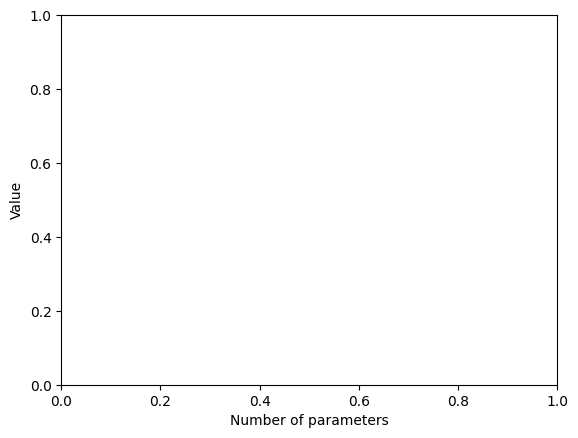

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Variables
n_datapoints = 101
# Likelihood

# Array of number of parameters
param = np.linspace(1, 20, 21)

# Define the functions
def AIC(L_max, p_k):
    aic =  -2 * np.log(L_max) + 2*p_k
    return aic

def BIC(L_max, p_k, n):
   bic = -2 * np.log(L_max) + np.log(n)*p_k
   return bic

plt.figure()
# plt.plot(param, AIC(Likelihood, param))
# plt.plot(param, BIC(Likelihood, param, n_datapoints))
plt.xlabel("Number of parameters")
plt.ylabel("Value")
plt.show()

In [34]:
#IMPORTS AND FUNCTIONS
import numpy as np
import scipy.stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#The functions for AIC & BIC
def AIC(L_max, p_k):
    aic = -2*L_max + 2*p_k
    return aic

def BIC(L_max, p_k, n):
   bic = -2*L_max + np.log(n)*p_k
   return bic

#Function to generate different degrees of polynomial functions
def poly_model(x, *p):
	'''
	polynomial of degree len(p)
	'''
	return  np.polyval(p, x)

#Function to simulate data using the true model
def sim_data(x, uncertainty=0.2):
    # find the model prediction
    y_true = model(x)
    
    # find the true uncertainty on the observations
    y_unc_true = np.abs(y_true)*uncertainty
    
    # generate data for a normal distribution
    y_sample = np.random.normal(y_true, y_unc_true, size=len(x))
    
    return y_sample, y_unc_true

#The likelihood function assuming it is a Gaussian distribution
def chisquared(model, y, y_err):
    chi = -0.5*np.sum(((model-y)**2)/y_err**2)
    return chi
#Is nu niet chisq maar gewoon de loglikelihood van een Gaussian. Voorfactor kan nog toegevoegd worden, maar verhoogd het gewoon met een constante
#dus kan wel weggelaten worden. Maak van chisquared echt de Gaussian en stop in de AIC/BIC de np.ln weer terug. Geeft uitleg en herstructureer.

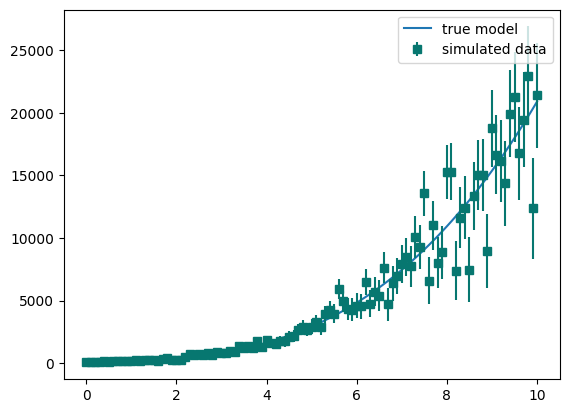

In [30]:
np.random.seed(10)

#Setting the true values for the model
a_true = 20
b_true = 3
c_true = 50
d_true = 101

#Setting amount of data points
xmin = 0
xmax = 10
npoints = 101
xx = np.linspace(xmin, xmax, npoints)

#The true polynomial model
def true_model(x, a=a_true, b=b_true, c=c_true, d=d_true):
    return a*x**3 + b*x**2 + c*x + d
#Choosing the model & simulating the data
model = true_model
data_example = sim_data(xx)

#Plot of the resulting data with true model
plt.clf()
plt.plot(xx, model(xx, a_true, b_true, c_true, d_true), label="true model")
plt.errorbar(xx, data_example[0],data_example[1], fmt='s', label='simulated data', color='#077770')
plt.legend()
# plt.yscale('log')
# plt.xscale('log')

#Simulate chi_sq 5000 times to find the maximum likelihood
N_sim = 5000
x = np.linspace(xmin, xmax, npoints)

chi = []
for t in range(N_sim):
    yy, y_err = sim_data(x)

    popt, pcov = curve_fit(model, xx, yy, absolute_sigma = False)
    chi_sq = np.sum(((model(xx, *popt)-yy)*2)/y_err)
    chi.append(chi_sq)
    
max_L = np.max(chi)
# print(max_L)


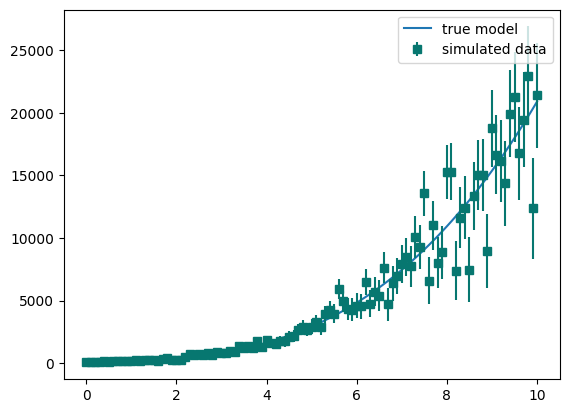

C:\Users\myvdz\AppData\Local\Temp\ipykernel_10380\767500801.py:22: RuntimeWarning: invalid value encountered in sqrt
  pcov = np.diag(np.sqrt(pcov))


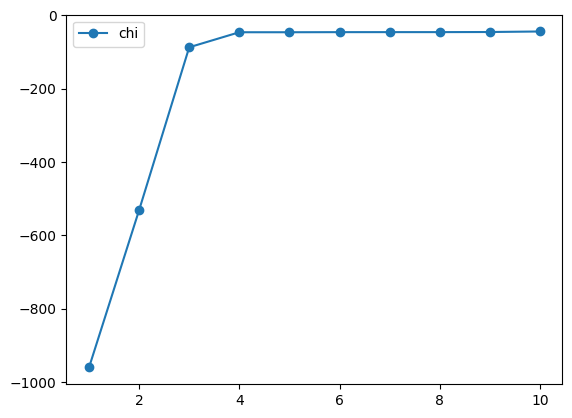

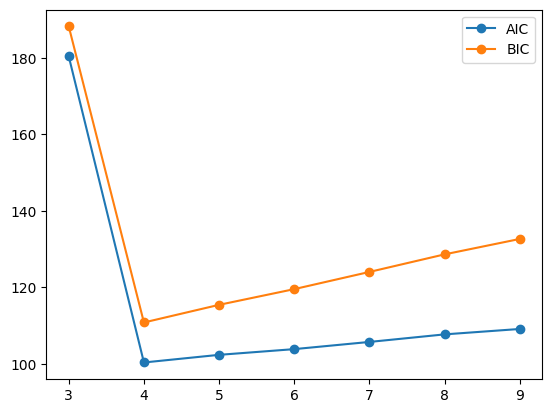

4.61512051684126
[np.float64(2.615120516841216), np.float64(5.230241033682432), np.float64(7.845361550523791), np.float64(10.460482067365035), np.float64(13.075602584206294), np.float64(15.690723101047567), np.float64(18.305843617888826), np.float64(20.920964134730085), np.float64(23.53608465157133), np.float64(26.151205168412588)]


In [33]:
#Setting maximum number of parameters
max_params = 10
params = np.arange(1, max_params+1, 1)
yy, y_err = data_example[0], data_example[1]
model=poly_model

#Plotting the simulated data and true model again
plt.figure()
plt.plot(xx, true_model(xx), label="true model")
plt.errorbar(xx, data_example[0],data_example[1], fmt='s', label='simulated data', color='#077770')
plt.legend()
plt.show()

#Calculating the chi_sq and aic&bic the different amounts of parameters
chi = []
aic = []
bic = []
diff = []
for i in params:
    p0 = np.zeros(i)
    popt, pcov = curve_fit(model, xx, yy, p0=p0, sigma=y_err, absolute_sigma = False)
    pcov = np.diag(np.sqrt(pcov))
    chi_sq = chisquared(model(xx, *popt), yy, y_err)
    chi.append(chi_sq)
    aic.append(AIC(chi_sq, len(popt)))
    bic.append(BIC(chi_sq, len(popt), npoints))
    diff.append(BIC(chi_sq, len(popt), npoints) - AIC(chi_sq, len(popt)))

#Plotting the results
plt.figure()
plt.plot(params, chi, marker="o", label="chi")
plt.legend()
plt.show()
plt.figure()
plt.plot(params[2:9], aic[2:9], marker="o", label="AIC")
plt.plot(params[2:9], bic[2:9], marker="o", label="BIC")
plt.legend()
plt.show()

print(np.log(npoints))
print(diff)



## Bootstrap and confidence intervals

The bootstrap method is a technique used to estimate a confidence interval for a parameter which inherently does not have a confidence interval. Thus before we talk about the bootstrap method and how it works we first need to understand confidence intervals. 

### Confidence intervals

Is a way to easily say some value can be found with a certain $\gamma$-confidence within an interval. For example, you want to find your parameter $heta$ with $\gamma$ = 95% confidence. It would not suffice to find some value $\theta$ within your data and say that you are 95% confident that the found $\theta$ is the actual $\theta$. You need to find the boundary of the interval in which you find $\theta$ 95% of the time. Thus eventually founding ($\theta_{lower}$, $\theta_{higher}$), now you have expressed an interval in which you can say a found $\theta$ resides 95% of the time.

The theorem behinds this states, and shows a way to compute it:

If $\hat{\theta} \approx N(\hat{\theta}^{*}, se[\hat{\theta}]^2)$ and $\hat{se}[\hat{\theta}] \rightarrow_p se[\hat{\theta}]$, the interval 
<a id="eq:CI"></a>
$$(\hat{\theta}_l, \hat{\theta}_u) = (\hat{\theta} - z_{\alpha/2} \hat{se}[\hat{\theta}], \hat{\theta} + z_{\alpha/2} \hat{se}[\hat{\theta}])$$
is an approximate $(1-\alpha)$-confidence interval where $z_{\alpha/2}$ are the corresponding quantile coming from $\gamma = 1 - \alpha$.

Below an example using a normal distribution is given.

The actual confidence interval would be (0.36, 3.64) for a gamma of 90%
The actual confidence interval would be (0.04, 3.96) for a gamma of 95%


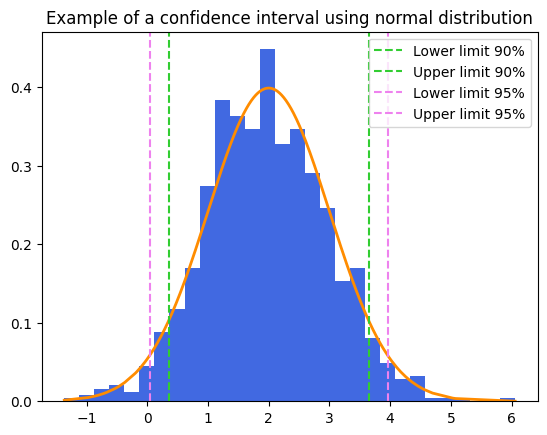

In [5]:
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt

# Here we generate some data like a normal distribution
mu, sigma = 2, 1
x = np.random.normal(mu, sigma, 1000)
x.sort()

gamma = 90 #The confidence we choose
gamma2 = 95

# calculating the z value
def z_alpha (gam):
    alpha = 1-(gam/100)
    z = norm.ppf(1-(alpha/2))
    return z

z = z_alpha(gamma)
z2 = z_alpha(gamma2)

lower1 = mu - z*sigma
upper1 = mu + z*sigma

lower2 = mu - z2*sigma
upper2 = mu + z2*sigma


print(f"The actual confidence interval would be ({lower1.round(2)}, {upper1.round(2)}) for a gamma of {gamma}%")
print(f"The actual confidence interval would be ({lower2.round(2)}, {upper2.round(2)}) for a gamma of {gamma2}%")

plt.title("Example of a confidence interval using normal distribution")
plt.hist(x, 30, density=True, color="royalblue")
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( -1 * (x - mu)**2 / (2 * sigma**2) ),linewidth=2, color='darkorange')
plt.axvline(lower1, color = 'limegreen', linestyle="--", label=f"Lower limit {gamma}%")
plt.axvline(upper1, color = 'limegreen', linestyle="--", label=f"Upper limit {gamma}%")
plt.axvline(lower2, color="violet", linestyle="--", label=f"Lower limit {gamma2}%")
plt.axvline(upper2, color="violet", linestyle="--", label=f"Upper limit {gamma2}%")
plt.legend()
plt.show()

As you can see from the example, the larger the $\gamma$ the larger the area in which you can find your parameter

### Bootstrap method

Suppose you have a dataset with a large number of entries and you want to use bayesian statistics to further develop a posterior likelihood. You need to have some distribution of your parameter which you can use later on, but you only have one dataset and thus one way to compute the parameter. The bootstrap method provides a way to develop a confidence interval for this parameter. It creates a new dataset from the original one with replacement, we do this by randomly selecting an entry from the dataset and putting it in our new dataset. In this way the new dataset is build up by a population of the original dataset. This way of using the bootstrap method is also know as the nonparametric bootstrap. The counterpart is the parametric bootstrap, here we use the most likely parameter estimates from the original dataset to construct a new dataset. From there we find a most likely parameter and return this value. This fails if the original dataset is misspecified and the nonparametric bootstrap essentially always works!

 The bootstrap algorithm works as follows:

- Step 1: Simulate $B \in \mathbb{N}$ independent datasets $X_{1,b}, ..., X_{n,b}$ from F, for $b = 1, ..., N$. Thus simulating $B$ bootstrap samples.
- Step 2: For each $b$, compute the parameter $\hat{\theta_b}$
- Step 3: Define your $\gamma$-confidence interval with $\hat{q}_{\alpha/2}$ and $\hat{q}_{\alpha/2}$ for each parameter $\hat{\theta_1}, ..., \hat{\theta_B}$
- Step 4: Define your confidence intervals
<a id="eq:upper_lower"></a>
$$(\hat{\theta}_l, \hat{\theta}_u) = (\hat{q}_{\alpha/2}, \hat{q}_{1-\alpha/2})$$

 
The next question we need to considere is the amount of bootstrap samples we need to use, thus how large does $B$ need to be to get the quantile estimates $\hat{q}_{\alpha/2},\hat{q}_{1-\alpha/2}$ to be stable. From multiple sources you can gather that finding an exact bootstrap sample size is not an exact science. Many say that 10.000 is a safe bet and thus this size. While many sources also mention that a sample size of 10.000 is also a very intense workload so for a quick test a sample size of 500 is all you need. The question thus is is how good you want your resolution to be, for a quick look into the confidence interval a sample of size of 500 is great and for an exact interval a sample size of 10.000 is recommend given your system can handle it. 

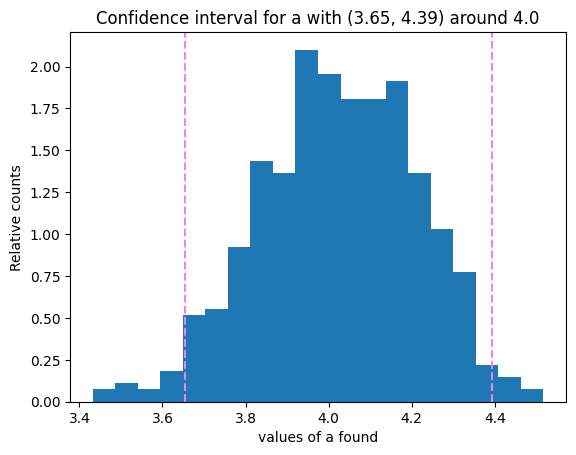

In [6]:
from scipy.optimize import curve_fit
import random

# Bootstrap exercise with sin(ax) as example
a_true = 4
b_true = 3

x_min = 0
x_max = 10
N = 100
x = np.linspace(x_min, x_max, N)

def linear(x, a, b):
    return a*x + b

def sim_data(x, fractional_uncertainty=0.2):

	# find the model prediction
	y_true = linear(x, a_true, b_true)

	# find the true uncertainty on the observations
	y_unc_true = np.abs(y_true)*fractional_uncertainty

	# generate data for a normal distribution
	y_sample = np.random.normal(y_true, y_unc_true, size=len(x))

	return y_sample, y_unc_true

y_samp, y_unc = sim_data(x)

bootstrap_samples = 500

a_s = []
for i in range(bootstrap_samples):
    x_data = []
    y_data = []
    for i in range(N):
        temp = random.randint(0, (N-1))
        x_data.append(x[temp])
        y_data.append(y_samp[temp])
    popt, pcov = curve_fit(linear, x_data, y_data, absolute_sigma=True, maxfev=800)
    a_s.append(popt[0])

# In our variable a_s we have a distribution of a's found by the bootstrap model.
# Now we need to determine our gamma-confidence 

gamma = 95

z = z_alpha(gamma)

mean_a = np.mean(a_s)
std_a = np.std(a_s)

lower = mean_a - z*std_a
higher = mean_a + z*std_a
# Now that we have the confidence interval, all we need to do is plot it

plt.hist(a_s, bins = 20, density=True)
plt.axvline(lower, color="violet", linestyle="--", label=f"Lower limit {gamma}%")
plt.axvline(higher, color="violet", linestyle="--", label=f"Upper limit {gamma}%")
plt.title(f"Confidence interval for a with ({lower.round(2)}, {higher.round(2)}) around {np.round(mean_a)}")
plt.ylabel("Relative counts")
plt.xlabel("values of a found")
plt.show()
